<a href="https://colab.research.google.com/github/sraeisi/MachineLearning_Physics/blob/master/1/MLP_Basics_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lecture 1, 2: Introduction
======



*   What is Machine Learning?
*   Unsupervised ML vs Supervised ML
*   Introduction to Supervised ML



## Preliminaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')

import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

import requests, io

<ipython-input-1-15abe9c60b85>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-talk')


In [2]:
'''Set the defaults for your plots.'''
# plt.rcParams.update({'font.size': 20, 'figsize':(8,6)})
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('axes', linewidth = 3 )
plt.rc('lines', linewidth = 5 )

plt.rc('lines', markersize = 10 )

plt.rc('figure', figsize=(10,5) )         # Image size

# Unsupervised ML

## Clustering

### Data

We first generate some data

In [8]:
from sklearn.datasets import make_biclusters
X_cls = make_biclusters(shape=(100, 2), n_clusters=2 , noise=5 )[0]

### Visualization of a clustering problem

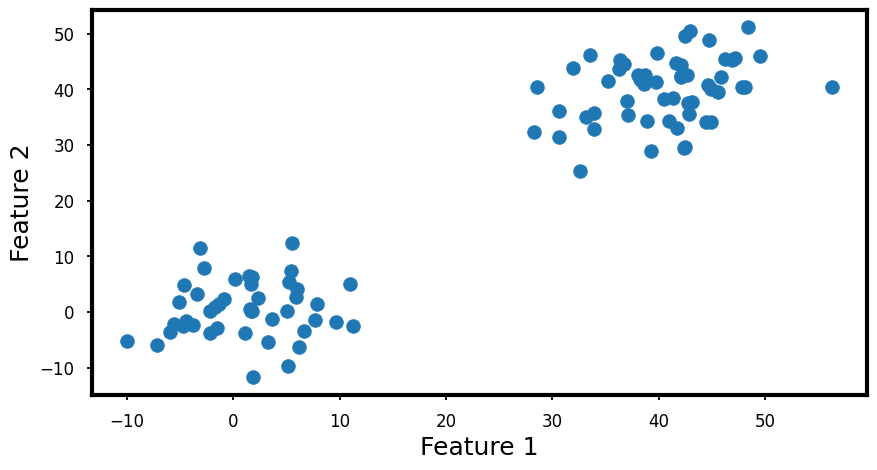

In [9]:
plt.scatter(*X_cls.T)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2');

What do you see in this plot?

### A real example

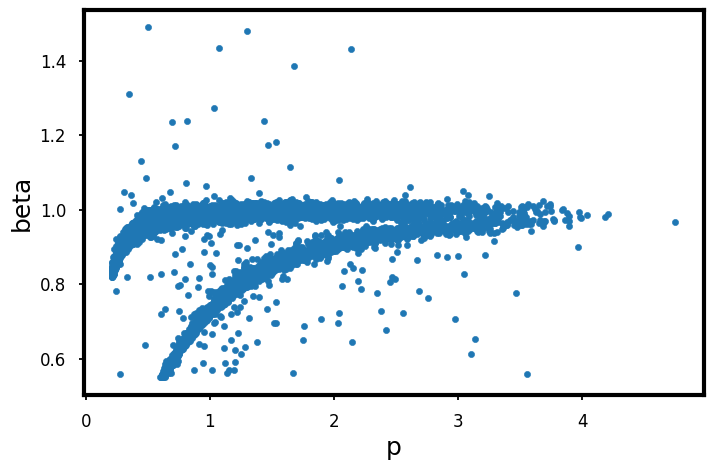

In [10]:
#@title Data for Particle identification (Binary)


url = 'https://raw.githubusercontent.com/sraeisi/Machine_Learning_Physics_Winter20/master/Lec1/particle_mini.npz'
s=requests.get(url, stream=True).content
data=np.load(io.BytesIO(s) )


## If want to run locally
# data= np.load('particle_mini.npz')

X, Y = data['X'], data['Y']

x_label='p'
y_label = 'beta'
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, xlabel = 'p', ylabel='beta')
ax.scatter(X[:,0], X[:,1],
           #c= Y , cmap=plt.cm.coolwarm,
           s=20)

plt.show()

## Dimensionality reduction

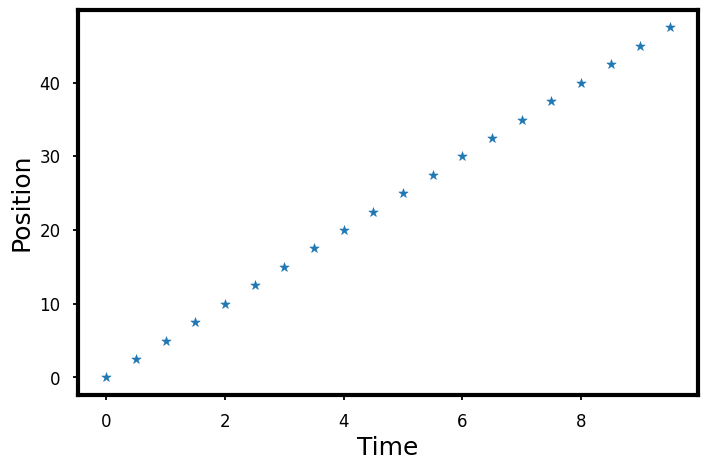

In [11]:
#@title Constant velocity motion

#@markdown How many degrees of freedom are there?

#@markdown Do we need both time and position?

v = 5
t_list = np.arange(0,10,.5)
x_list = v * np.arange(0,10,.5)


x_label='Time'
y_label = 'Position'
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, xlabel = x_label, ylabel=y_label)
ax.scatter(t_list, x_list, marker='*',
           s=50)

plt.show()

This is a 2D example that can be mapped into 1D (just time).

## Annomoly detection

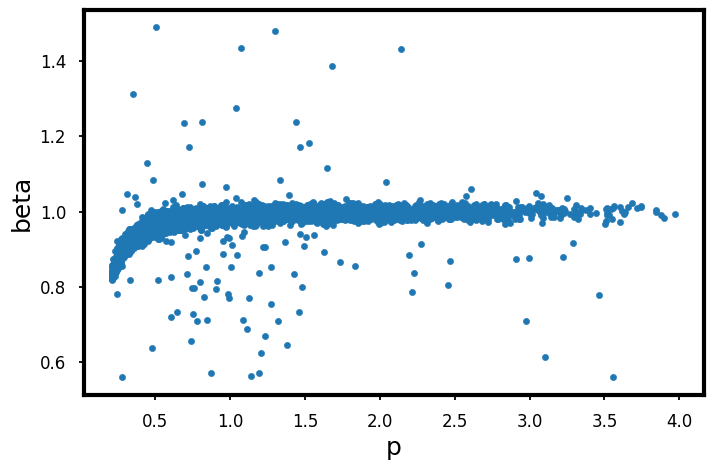

In [12]:
#@title Data for Particle identification (Binary)


url = 'https://raw.githubusercontent.com/sraeisi/Machine_Learning_Physics_Winter20/master/Lec1/particle_mini.npz'
s=requests.get(url, stream=True).content
data=np.load(io.BytesIO(s) )


## If want to run locally
# data= np.load('particle_mini.npz')

X, Y = data['X'], data['Y']

x_label='p'
y_label = 'beta'
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, xlabel = 'p', ylabel='beta')
ax.scatter(X[Y==1,0], X[Y==1,1],
           #c= Y , cmap=plt.cm.coolwarm,
           s=20)

plt.show()

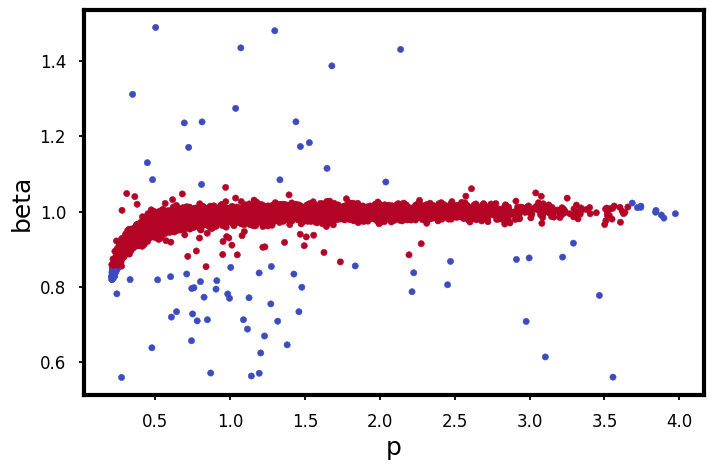

In [13]:
#@title Let's color the outliers

from sklearn.covariance import EllipticEnvelope
clf = EllipticEnvelope( contamination=.3)
clf.fit(X)

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, xlabel = 'p', ylabel='beta')
ax.scatter(X[Y==1,0], X[Y==1,1],
           c= clf.predict(X[Y==1]) ,
           cmap=plt.cm.coolwarm,
           s=20)

plt.show()

# Supervised ML

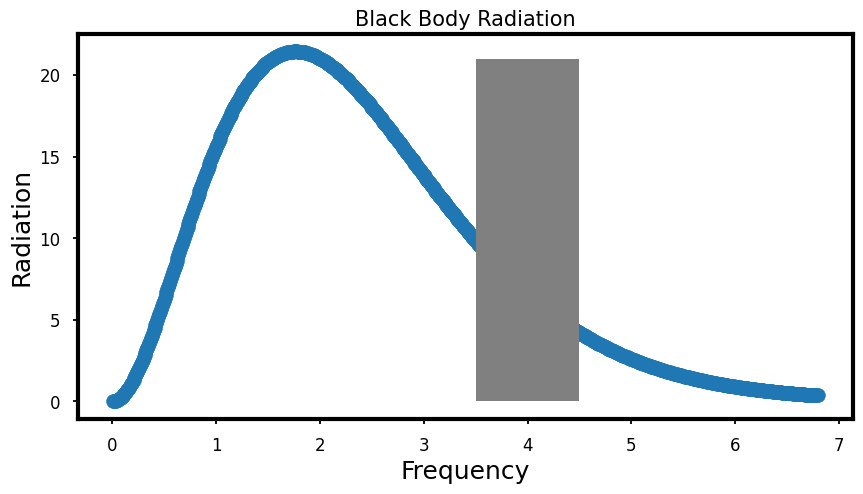

In [14]:
#@title Black-body radition


#####BBR######
## This data is collected from galileo.phys.virginia.edu/classes/252
url = "https://github.com/sraeisi/MachineLearning_Physics/blob/master/Data/bbr.xls?raw=true"
data_bbr = pd.read_excel(url)

##Scaling the data
data_bbr['T'] = 10**20 * data_bbr['T']
data_bbr[0] = 10**(-13) * data_bbr[0]

from matplotlib.patches import Rectangle

x_label = 'Frequency'
y_label = 'Radiation'
plt_title = 'Black Body Radiation'
fig = plt.figure()
ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title)
ax.scatter(data_bbr[0], data_bbr['T'])
ax.add_patch(Rectangle((3.5, 0), 1, 21,
            #  edgecolor = 'pink',
             facecolor = 'gray',
             fill=True,
             lw=5))

# ax.scatter(data_bbr[0][::n_s_rate], 10**20*data_bbr['T/2'][::n_s_rate])
plt.show()

Two types of questions:



*   What is the value (radiation) at X (or frequency) = 4?
*   How does the radition depend on the frequency? Or what is f in Y = f(X) ?



## Classification

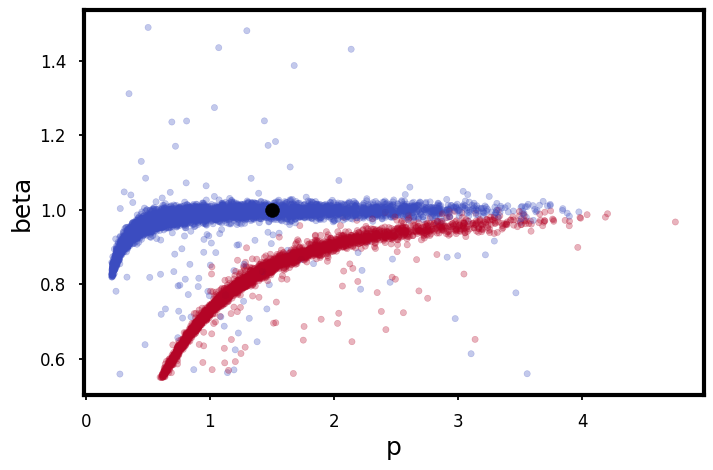

In [16]:
#@title Data for Particle identification (Binary)


url = 'https://raw.githubusercontent.com/sraeisi/Machine_Learning_Physics_Winter20/master/Lec1/particle_mini.npz'
s=requests.get(url, stream=True).content
data=np.load(io.BytesIO(s) )


## If want to run locally
# data= np.load('particle_mini.npz')

X, Y = data['X'], data['Y']

x_label='p'
y_label = 'beta'
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, xlabel = 'p', ylabel='beta')
ax.scatter(X[:,0], X[:,1],
           c= Y , cmap=plt.cm.coolwarm,
           s=20, alpha = .3)
plt.scatter(1.5,1, c='black',  s=100)
plt.show()

# Introduction to Supervised ML

Consider the spring example in the notes.
Let's see how the actual data would look like.


In [17]:
'''This data is taken from lab report of students in Phys_Lab 3.'''

import io, requests

url = 'https://raw.githubusercontent.com/sraeisi/MachineLearning_Physics/master/Data/Spring.csv'
s = requests.get(url).content
exp_data = pd.read_csv(io.StringIO(s.decode('utf-8')))


exp_data

,Displacement,Force
0,11.5,0.0
1,14.7,0.1
2,18.0,0.2
3,21.3,0.3
4,24.5,0.4
5,27.6,0.5


<Axes: xlabel='Displacement', ylabel='Force'>

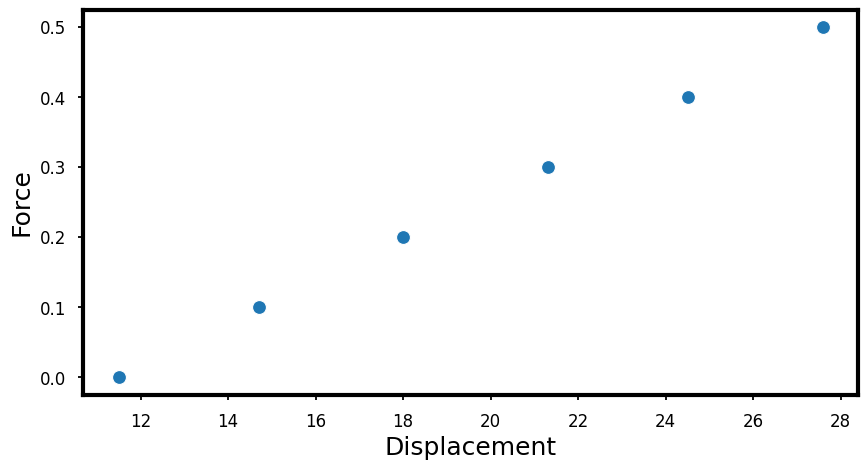

In [18]:
sns.scatterplot(data=exp_data, x='Displacement', y='Force')

In [21]:
## Build a simple model

def model(displacement):
  ## design your model here
  f= .01*(displacement - 11.5)
  return f

In [22]:
exp_data['Model_Prediction'] = exp_data.Displacement.apply(model)
exp_data

,Displacement,Force,Model_Prediction
0,11.5,0.0,0.000
1,14.7,0.1,0.032
2,18.0,0.2,0.065
3,21.3,0.3,0.098
4,24.5,0.4,0.130
5,27.6,0.5,0.161


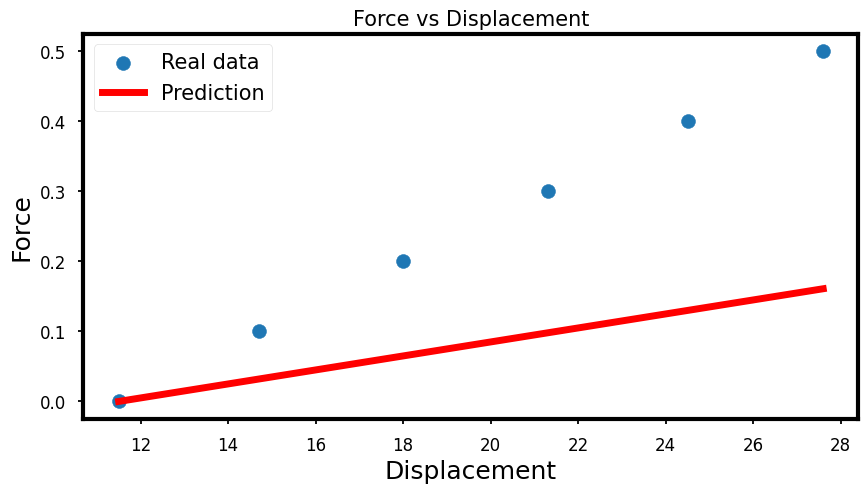

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='Displacement', ylabel='Force', title='Force vs Displacement')

plt.scatter(exp_data.Displacement, exp_data.Force, label='Real data')
plt.plot(exp_data.Displacement, exp_data.Model_Prediction, label='Prediction', c='r')
plt.legend(loc=0)
plt.show()


In [24]:
## Calculate the distance between the prediction and the real data  => Loss

def dist(Y, Y_pred):

  d = np.sum(np.abs( Y - Y_pred ))  ## replace this with what you think is good for the loss

  return d

## now calculate the distance between your prediction and the actual force.
dist( exp_data.Force , exp_data.Model_Prediction )

1.014

## Finding a better model

Try to play with your model to improve it.

What does it mean to improve the model?



In [25]:
'''
Parametric Model:
Here I make a model that has some parameters that we can play with.
'''

def model(displacement, w=0):
  ## Let's make a linear model with 0 interception.
  f = w * (displacement -11.5)

  return f


In [26]:
## Let's see what the predictions are:
exp_data['Model_Prediction'] = exp_data.Displacement.apply(lambda x: model(x, .01))
exp_data


,Displacement,Force,Model_Prediction
0,11.5,0.0,0.000
1,14.7,0.1,0.032
2,18.0,0.2,0.065
3,21.3,0.3,0.098
4,24.5,0.4,0.130
5,27.6,0.5,0.161


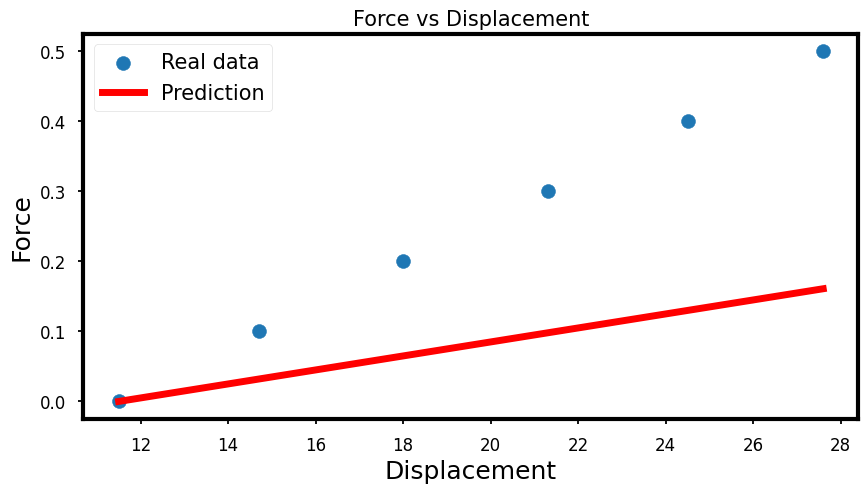

The distance between prediction and real data is 1.014.


In [27]:

fig = plt.figure()
ax = fig.add_subplot(111, xlabel='Displacement', ylabel='Force', title='Force vs Displacement')

plt.scatter(exp_data.Displacement, exp_data.Force, label='Real data')
plt.plot(exp_data.Displacement, exp_data.Model_Prediction, label='Prediction',c='r')
plt.legend(loc=0)
plt.show()
print(f'The distance between prediction and real data is {dist( exp_data.Force , exp_data.Model_Prediction )   }.')

In [28]:
#@title let's play with the parameter and find a good model!

from ipywidgets import interact, fixed, FloatSlider

def plot_both(w):
  exp_data['Model_Prediction'] = exp_data.Displacement.apply(lambda x: model(x, w))

  fig = plt.figure()
  ax = fig.add_subplot(111, xlabel='Displacement', ylabel='Force', title='Force vs Displacement')

  plt.scatter(exp_data.Displacement, exp_data.Force, label='Real data')
  plt.plot(exp_data.Displacement, exp_data.Model_Prediction, label='Prediction', c='r')
  # plt.ylim(-.1,.7)
  plt.legend(loc=0)
  # plt.show()
  plt.close(fig)
  return fig

interact(plot_both, w=FloatSlider(min=0.0, max=.07, step=.0001, value=0.01))

interactive(children=(FloatSlider(value=0.01, description='w', max=0.07, step=0.0001), Output()), _dom_classes…

<function __main__.plot_both(w)>

### Learning

Find the best model that you can!

Explain the process!


CPU times: user 927 ms, sys: 1.38 ms, total: 928 ms
Wall time: 930 ms


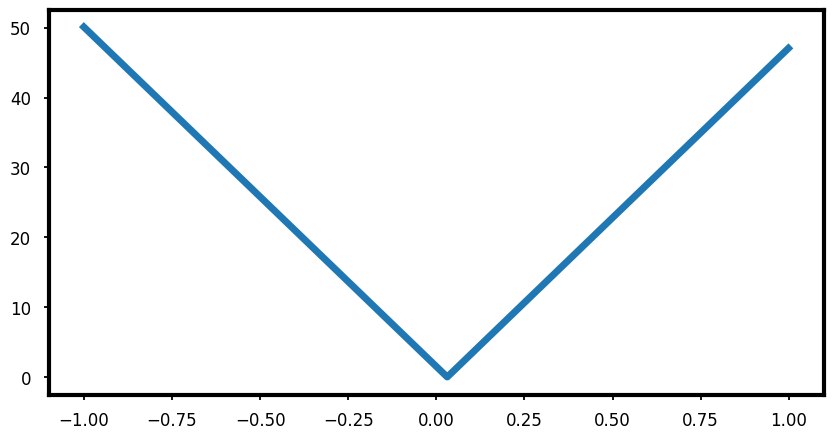

In [29]:
%%time
## Plot distance vs param
dparam = .001
dist_list = [dist( exp_data.Force , model(exp_data.Displacement , p) )  for p in np.arange(-1,1,dparam)  ]
plt.plot(np.arange(-1,1,dparam), dist_list )

In [30]:
print(f'The optimal value for w seems to be around {np.arange(-1,1,.0001)[np.argmin(dist_list)]}.\n')
print(f'For this value of w, the loss is {dist( exp_data.Force , model(exp_data.Displacement , 0.0141) )}.' )


The optimal value for w seems to be around -0.8969000000000114.

For this value of w, the loss is 0.81474.


In [31]:
### Two parameter model:

'''
Parametric Model:
Here I make a model that has some parameters that we can play with.
'''

def model(displacement, w=0, b=0):
  ## Let's make a linear model with 0 interception.
  f = w * displacement + b

  return f


In [32]:
## Let's see what the predictions are:
exp_data['Model_Prediction'] = exp_data.Displacement.apply(lambda x: model(x, .01, .1))
exp_data

,Displacement,Force,Model_Prediction
0,11.5,0.0,0.215
1,14.7,0.1,0.247
2,18.0,0.2,0.280
3,21.3,0.3,0.313
4,24.5,0.4,0.345
5,27.6,0.5,0.376


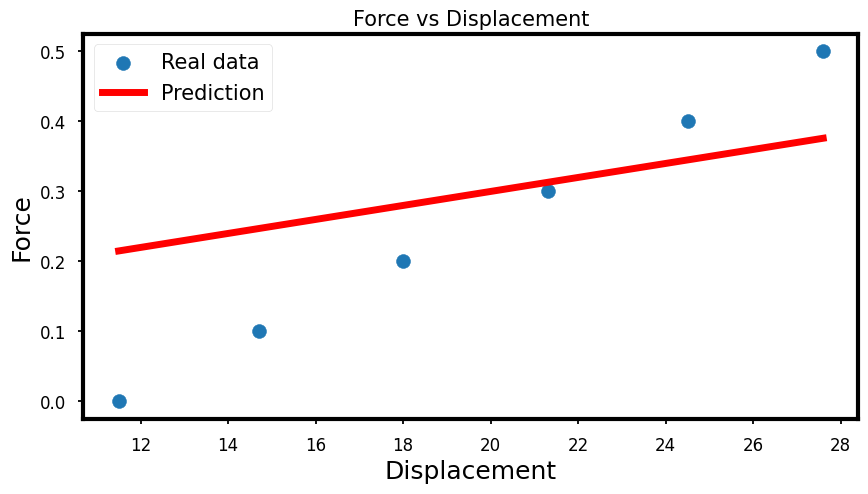

The distance between prediction and real data is 0.6340000000000001.


In [33]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='Displacement', ylabel='Force', title='Force vs Displacement')

plt.scatter(exp_data.Displacement, exp_data.Force, label='Real data')
plt.plot(exp_data.Displacement, exp_data.Model_Prediction, label='Prediction', c='r')
plt.legend(loc=0)
plt.show()
print(f'The distance between prediction and real data is {dist( exp_data.Force , exp_data.Model_Prediction )   }.')

In [34]:
from ipywidgets import interact, fixed, FloatSlider

def plot_both(w,b):
  exp_data['Model_Prediction'] = exp_data.Displacement.apply(lambda x: model(x, w,b))

  fig = plt.figure()
  ax = fig.add_subplot(111, xlabel='Displacement', ylabel='Force', title='Force vs Displacement')

  plt.scatter(exp_data.Displacement, exp_data.Force, label='Real data')
  plt.plot(exp_data.Displacement, exp_data.Model_Prediction, label='Prediction', c='r')
  # plt.ylim(-.1,.7)
  plt.legend(loc=0)
  # plt.show()
  plt.close(fig)
  return fig

interact(plot_both, w=FloatSlider(min=0.0, max=.05, step=.0001, value=0),
         b=FloatSlider(min=-1, max=1.0, step=.0001, value=0))

interactive(children=(FloatSlider(value=0.0, description='w', max=0.05, step=0.0001), FloatSlider(value=0.0, d…

<function __main__.plot_both(w, b)>

The index for the optimal values are (13, 66).

The optimal values are (0.03, -0.34).

The min loss values is 0.0240.



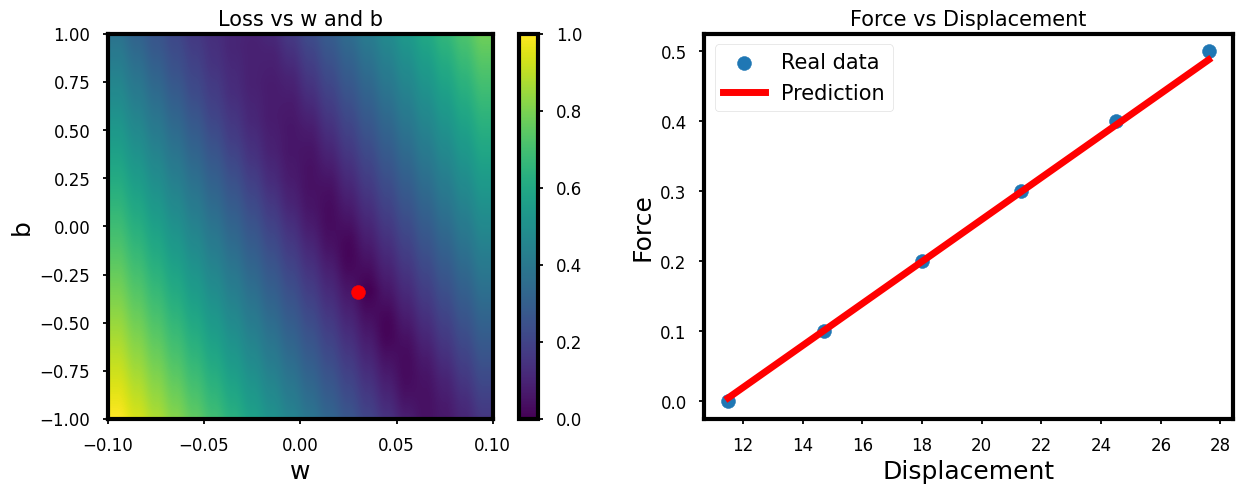

In [38]:
## Plot distance vs param
dist_list = np.array([[dist( exp_data.Force ,
                   model(exp_data.Displacement , w,b) )  for w in np.arange(-.1,.1,.01)  ] for b in np.arange(-1,1,.01)])

## The index for the optimal values are:
opt_ind = np.unravel_index( np.argmin(dist_list ), dist_list.shape )
print(f'The index for the optimal values are {opt_ind[::-1]}.\n')

## The optimal values are :
opt_param = np.round(np.arange(-.1,.1,.01)[opt_ind[1]], 3), np.round(np.arange(-1,1,.01)[opt_ind[0]], 3)
print(f'The optimal values are {opt_param}.\n')

# The min loss values is :
print(f'The min loss values is {dist_list[opt_ind]:.4f}.\n')


fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121, xlabel='w', ylabel='b', title='Loss vs w and b')

plt.imshow(dist_list, extent=[-.1,.1,-1,1], aspect=.10, origin='lower')
plt.scatter(*opt_param, c='r')
plt.colorbar()

ax = fig.add_subplot(122, xlabel='Displacement', ylabel='Force', title='Force vs Displacement')
plt.scatter(exp_data.Displacement, exp_data.Force, label='Real data')
plt.plot(exp_data.Displacement, model(exp_data.Displacement , opt_param[0], opt_param[1]) , label='Prediction', c='r')
plt.legend(loc=0)
plt.show()

Why is the point in the left panel not right in the middle of the blue region?

In other words, why does it seem to deviate from the actual optimal point?

### Using sklearn

https://scikit-learn.org/stable/

This is one of the widely used libraries in ML, specially for traditional ML techniques, evaluation and model selection.

In [40]:
from sklearn.linear_model import LinearRegression

'''
We first train an estimator which  finds a good fit to the data.
'''

reg = LinearRegression()  ## Defines/Constructs the estimator
reg.fit(exp_data.Displacement.values.reshape(-1,1), exp_data.Force)  ##Trains the estimator


LinearRegression()

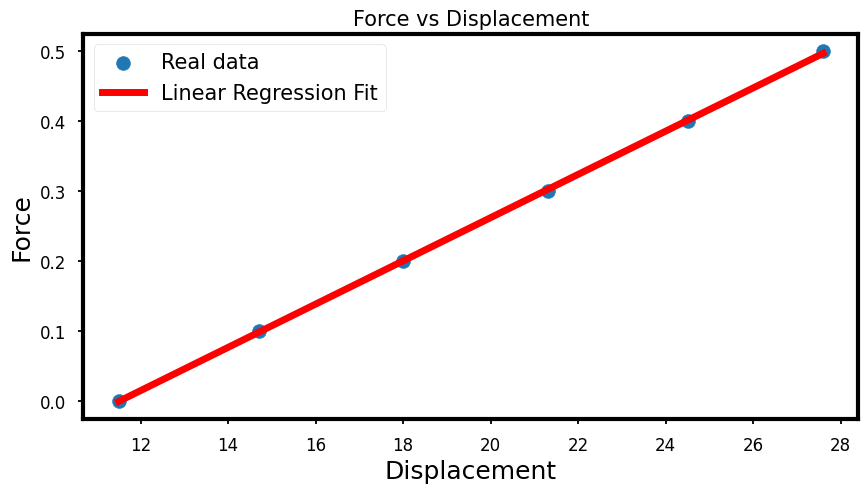

In [41]:
#@title The model found by sklearn.

x = np.arange(0,5,.1).reshape(50,1)

### Now we plot the
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='Displacement', ylabel='Force', title='Force vs Displacement')

plt.scatter(exp_data.Displacement, exp_data.Force, label='Real data')
ax.plot(exp_data.Displacement, reg.predict( exp_data.Displacement.values.reshape(-1,1) ) ,
        label='Linear Regression Fit' , c= 'r')
plt.legend(loc=0)
plt.show()


In [42]:
print(f'The optimal w is {reg.coef_[0]:.4f} and the optimal b is {reg.intercept_:.4f}.\n')
print('This is in reasonable agreement with the ones we got.')

The optimal w is 0.0309 and the optimal b is -0.3559.

This is in reasonable agreement with the ones we got.


#Exercise


## Balck Body Radiation
Do the same for the black body radiation.

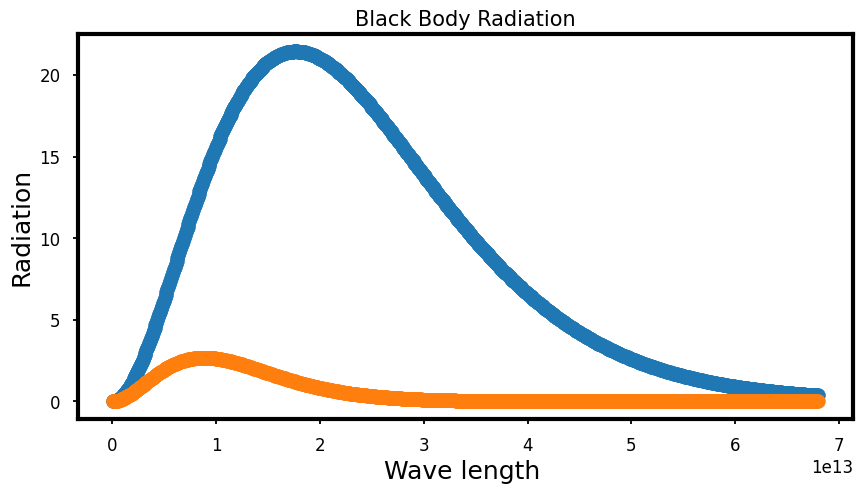

In [43]:
#####BBR######
## This data is collected from galileo.phys.virginia.edu/classes/252
url = "https://github.com/sraeisi/MachineLearning_Physics/blob/master/Data/bbr.xls?raw=true"
data_bbr = pd.read_excel(url)

n_s_rate=1

x_label = 'Wave length '
y_label = 'Radiation'
plt_title = 'Black Body Radiation'
fig = plt.figure()
ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title)

ax.scatter(data_bbr[0][::n_s_rate], 10**20*data_bbr['T'][::n_s_rate])
ax.scatter(data_bbr[0][::n_s_rate], 10**20*data_bbr['T/2'][::n_s_rate])
plt.show()

In [44]:
data_bbr.head(2)

,0,T,0.1,T/2,0.2
0,88182000000,2.978514e-23,2.997673e-23,1.478758e-23,1.498837e-23
1,176364000000,1.183007e-22,1.199069e-22,5.831636e-23,5.995346e-23


In [ ]:
'''
Exercise:
Find a fit and plot them along side the data.

- Use X and Y defined here.
- Build a model
- Plot your model with the data

Can you use the simple model we had before?
Is it easy to guess the parameters of the model?
'''

In [47]:
X = 10**(-13)*data_bbr[0].values.reshape(-1,1)
Y = 10**20*data_bbr['T']

### Sample Solution

Look into the sklearn library and try a few different techniques.

In [50]:
### Let's try a simple model to see how this works:
from sklearn.linear_model import SGDRegressor
sgd_rg = SGDRegressor(  )
sgd_rg.fit(X,Y)
sgd_rg.score(X,Y)

0.4031429255888789

In [51]:
### Calcualte the distance between the predicted Y and the actual Y, how good is it?
Y_pred = sgd_rg.predict(X)
from sklearn.metrics import mean_squared_error
print(f'The MSE is {mean_squared_error(Y, Y_pred)}')

The MSE is 32.92605549015212


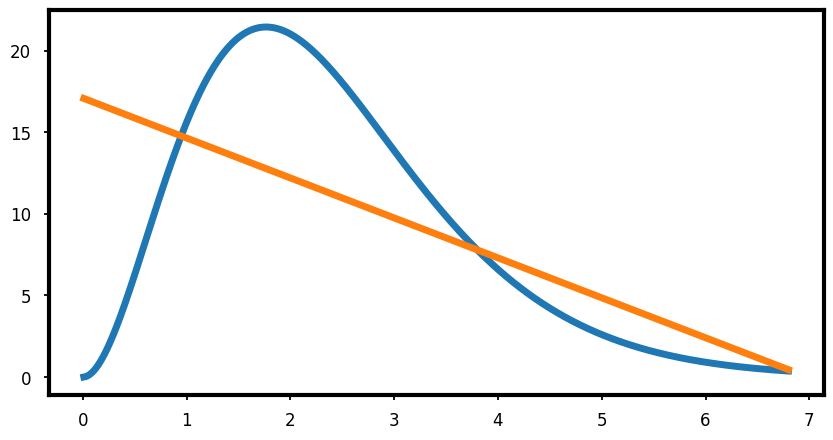

In [52]:
plt.plot(X,Y)
plt.plot(X,Y_pred)
## Not a good fit, how can we improve this?

## Multi-feature data

Do the same for the following data.

In [53]:
'''
We need to first import the data. I took the data from the following kaggle dataset.

https://www.kaggle.com/burakhmmtgl/energy-molecule

These are the ground state energies of some molecules based on their different
chemical bounds.
'''
import io, requests
url = 'https://www.dropbox.com/s/das9t6vwp7t4b7f/roboBohr.csv.zip?dl=1'
s=requests.get(url, stream=True).content
data=pd.read_csv(io.BytesIO(s) , compression='zip' , index_col=0)

'''
Alternatively, you can download the file into your computer and run the following code.
You need to uncomment it first.
'''
# data = pd.read_csv('roboBohr.csv.zip', compression='zip', index_col=0)

data.head()

,0,1,2,3,4,5,6,7,8,9,...,1267,1268,1269,1270,1271,1272,1273,1274,pubchem_id,Eat
0,73.516695,17.817765,12.469551,12.458130,12.454607,12.447345,12.433065,12.426926,12.387474,12.365984,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,25004,-19.013763
1,73.516695,20.649126,18.527789,17.891535,17.887995,17.871731,17.852586,17.729842,15.864270,15.227643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25005,-10.161019
2,73.516695,17.830377,12.512263,12.404775,12.394493,12.391564,12.324461,12.238106,10.423249,8.698826,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25006,-9.376619
3,73.516695,17.875810,17.871259,17.862402,17.850920,17.850440,12.558105,12.557645,12.517583,12.444141,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25009,-13.776438
4,73.516695,17.883818,17.868256,17.864221,17.818540,12.508657,12.490519,12.450098,10.597068,10.595914,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25011,-8.537140


Exercise

Do the same, find a model and find a way to compare your results against actual ground state energies.


In [ ]:
'''
Do the same, find a model and find a way to compare your results against actual ground state energies.
'''


